In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
from tqdm.notebook import tqdm
import skimage.io
import glob
from new_tile import *
from new_tile import _mask_tissue

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = pd.read_csv('../input/prostate-cancer-grade-assessment/train.csv')
input_path = '../input/prostate-cancer-grade-assessment/train_images/'
data.head(3)

image_id data_provider  isup_grade gleason_score
0  0005f7aaab2800f6170c399693a96917    karolinska           0           0+0
1  000920ad0b612851f8e01bcc880d9b3d    karolinska           0           0+0
2  0018ae58b01bdadc8e347995b69f99aa       radboud           4           4+4

In [64]:
def read_image(image_path, resize_ratio=1, level = 1):
    
    if not(isinstance(image_path, str)):
        # if tensor with byte string
        image_path = image_path.numpy().decode('utf-8')
        
    image_level_0 = skimage.io.MultiImage(image_path)[level]
    
    if resize_ratio != 1:
        new_w = int(image_level_0.shape[1]*resize_ratio)
        new_h = int(image_level_0.shape[0]*resize_ratio)
        image_level_1 = cv2.resize(
            image_level_0, (new_w, new_h), interpolation=cv2.INTER_AREA)
    
    return image_level_0, image_level_1

In [149]:
image_id = "b5343f9567df8a68c3276f8d8cdcc6a5"
# image_id = data.image_id[666]
image0, image1 = read_image(input_path + image_id + '.tiff', resize_ratio = 1/8, level = 1)

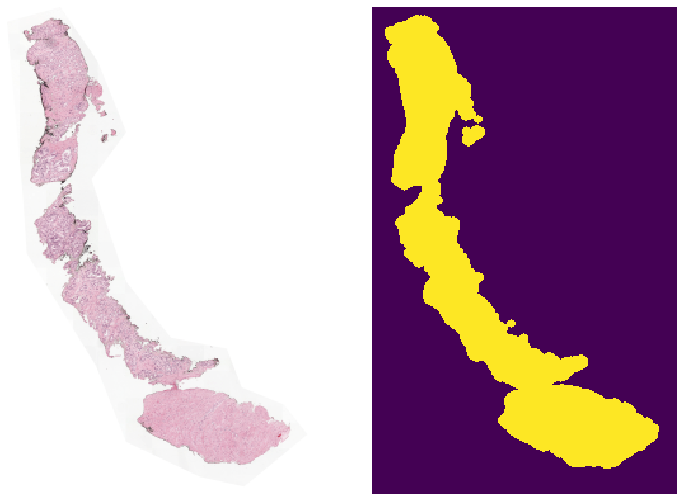

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
mask = _mask_tissue(image1)
axes[0].imshow(image1)
axes[1].imshow(mask)
axes[0].axis('off')
axes[1].axis('off');

In [151]:
patch_size = 32
coords = compute_coords(image1, 
                        patch_size = patch_size, 
                        precompute = True,
                       min_patch_info=0.1,
                       min_axis_info=0.1,
                       min_consec_axis_info=0.1,
                       min_decimal_keep=0.5)
print("    val  y   x\n", coords[:10])
len(coords)
# image, coords = compute_coords(image, patch_size = 256,precompute=False)
# print("    val  y   x\n", coords[:10])

    val  y   x
 [[203   9   4]
 [202   9  36]
 [197  41  14]
 [200  41  46]
 [194  73  24]
 [205  73  56]
 [196 105  21]
 [200 137  24]
 [198 169  15]
 [194 169  47]]


25

(-0.5, 1919.5, 3071.5, -0.5)

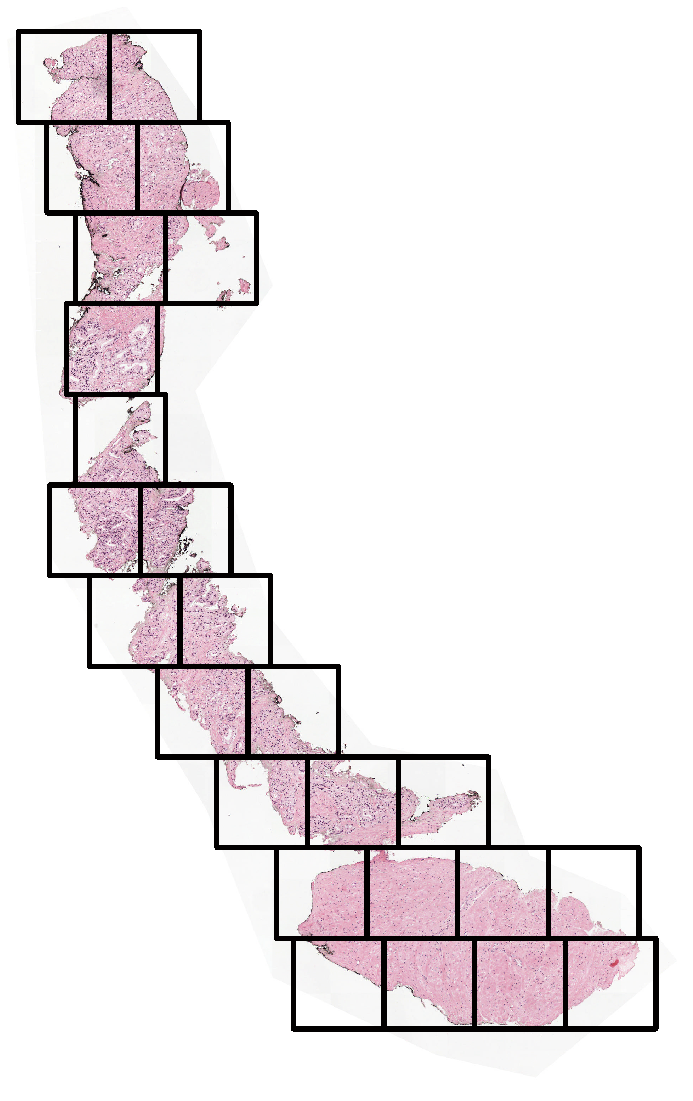

In [152]:
coords = coords * 8
coords = sorted(coords, key= lambda x: x[0], reverse=False)
for (v, y, x) in coords:
    end_point = (x, y)
    start_point = (x+patch_size * 8, y+patch_size * 8)
    image_rec = cv2.rectangle(image0, start_point, end_point, 2, 14)

fig, axes = plt.subplots(1, 1, figsize=(20,20))
axes.imshow(image_rec)
axes.axis('off')

In [143]:
fig, axes = plt.subplots(6, 6, figsize=(140, 140))
for i, ax in enumerate(axes.reshape(-1)):
    v, x, y = coords[i%(len(coords))]
    end_point = (x, y)
    start_point = (x+256, y+256)
    image_rec = image0[x:x+256, y:y+256,:]
#     image_rec = cv2.rectangle(image0, start_point, end_point, 2, 14)
    
    ax.imshow(image_rec)
#     ax.axis('off')
#     ax.set_title(
#         "num patches = "+str(len(coords))+", isup grade = "+str(data.isup_grade[i+500]),
#         fontsize=20)

plt.subplots_adjust(hspace=0.05, wspace=0.05)

In [87]:
len(coords)

33